In [3]:
import pandas as pd

census_data = pd.read_csv(r"C:\Users\Emil\Desktop\County election prediction 2024\PROJECT.csv")
census_data.head()

,FIPS_Code,Rural Urban Continuum Code,Economic typology 2015,Death rate,Net Migration rate,Less than HS rate,HS Graduate rate,Some College rate,Bachelor+ rate,Unemployment rate,...,Hawaiian Pacific Male,Hawaiian Pacific Female,Multi Male Rate,Multi Female Rate,White alone or in combination Rate,Black alone or in combination Rate,Native American alone or in combination Rate,Asian American alone or in combination Rate,Hawaiian alone or in combination Rate,Republican
0,1001,2,0,10.3,8.7,9.721098,32.675939,29.320284,28.282680,2.2,...,0.000795,0.000597,0.010706,0.011186,0.764658,0.226641,0.010772,0.018395,0.002536,1
1,1003,3,5,10.6,28.4,8.268600,27.542038,31.391725,32.797637,2.3,...,0.000304,0.000391,0.010209,0.010982,0.893707,0.094151,0.016986,0.016583,0.000813,1
2,1005,6,3,14.2,-1.3,22.186295,37.604947,28.744044,11.464715,4.4,...,0.001708,0.001342,0.008216,0.007200,0.509294,0.481310,0.013504,0.007932,0.002115,1
3,1007,1,0,13.2,-3.1,19.659783,41.127362,27.744649,11.468207,2.5,...,0.001052,0.000412,0.008094,0.008597,0.781919,0.215658,0.012210,0.005442,0.001372,1
4,1009,1,0,13.0,6.4,17.303798,35.617575,31.499597,15.579030,2.1,...,0.000836,0.000502,0.006854,0.008025,0.966364,0.026481,0.014143,0.006670,0.001120,1


In [ ]:
X = census_data.iloc[:, 1:-1]  # All rows, all columns except the first and last
y = census_data.iloc[:, -1]   # All rows, only last column
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
3138    1
3139    0
3140    1
3141    1
3142    1
Name: Republican, Length: 3143, dtype: int64


Fitting the classifier model:

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_classification_model = RandomForestClassifier(n_estimators=100, oob_score=True,random_state=1)

rf_classification_model.fit(X, y)

RandomForestClassifier(oob_score=True, random_state=1)

<AxesSubplot:>

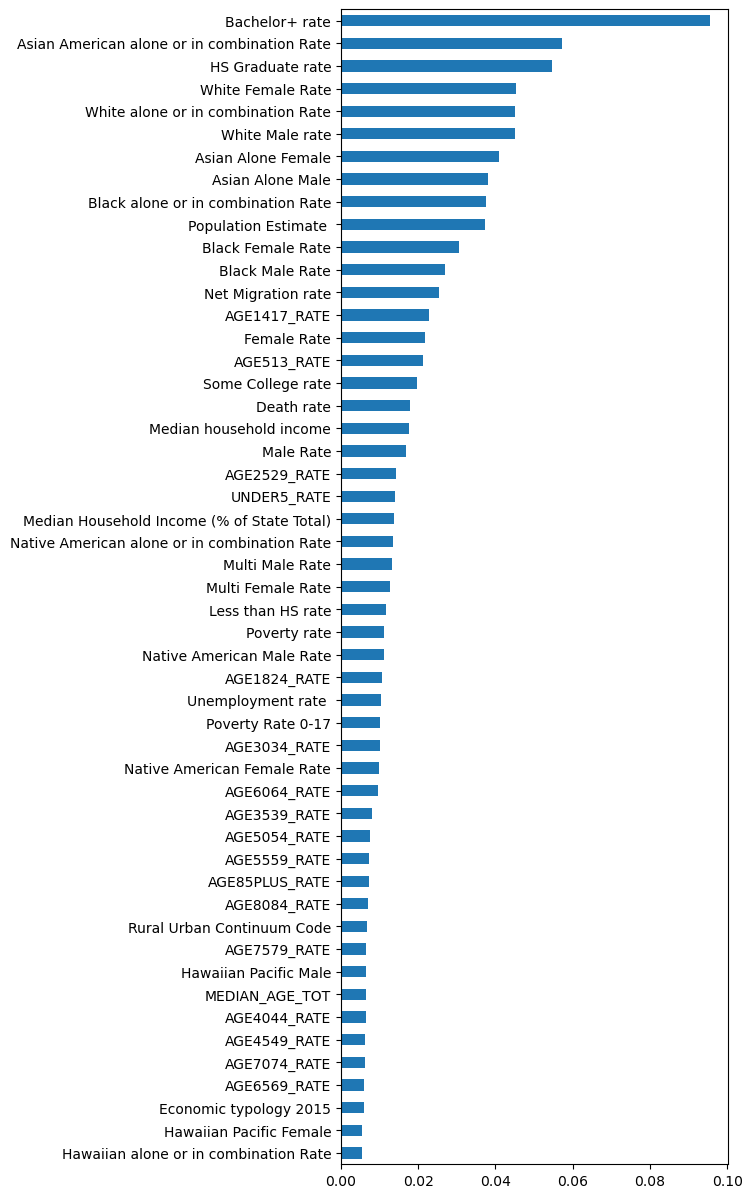

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(rf_classification_model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(5,15))

In [ ]:

# Get sorted feature importances
feature_importance = pd.Series(
    rf_classification_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Convert to ordered list
sorted_features = feature_importance.index.tolist()

filtered_cols = sorted_features[:10]
print(filtered_cols)

['Bachelor+ rate', 'Asian American alone or in combination Rate', 'HS Graduate rate', 'White Female Rate', 'White alone or in combination Rate', 'White Male rate', 'Asian Alone Female', 'Asian Alone Male', 'Black alone or in combination Rate', 'Population Estimate ', 'Black Female Rate', 'Black Male Rate', 'Net Migration rate', 'AGE1417_RATE', 'Female Rate', 'AGE513_RATE', 'Some College rate', 'Death rate', 'Median household income', 'Male Rate', 'AGE2529_RATE', 'UNDER5_RATE', 'Median Household Income (% of State Total)', 'Native American alone or in combination Rate', 'Multi Male Rate', 'Multi Female Rate', 'Less than HS rate', 'Poverty rate', 'Native American Male Rate', 'AGE1824_RATE', 'Unemployment rate ', 'Poverty Rate 0-17', 'AGE3034_RATE', 'Native American Female Rate', 'AGE6064_RATE', 'AGE3539_RATE', 'AGE5054_RATE', 'AGE5559_RATE', 'AGE85PLUS_RATE', 'AGE8084_RATE', 'Rural Urban Continuum Code', 'AGE7579_RATE', 'Hawaiian Pacific Male', 'MEDIAN_AGE_TOT', 'AGE4044_RATE', 'AGE4549_

Correlation matrix of features with high importance

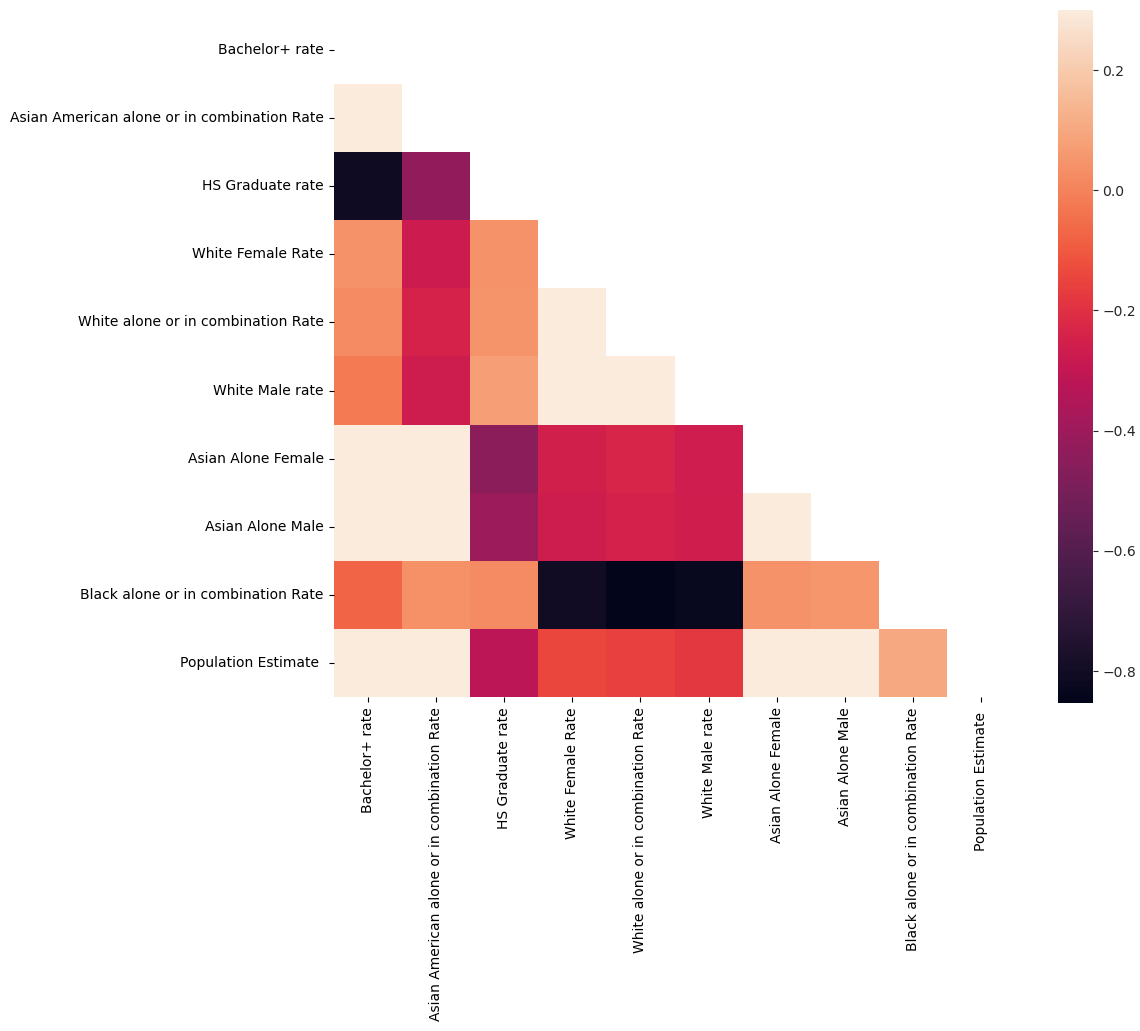

In [ ]:
import numpy as np
import seaborn as sns

filtered_data = census_data[filtered_cols]

def make_heatmap(df):
    f, ax = plt.subplots(figsize=(11, 9))
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
        
%matplotlib inline

make_heatmap(filtered_data)